## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 genuine confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    Dev file index: 572 0.999953 4.72011e-05 9.96105
    Dev file index: 414 0.999953 4.73798e-05 9.95727
    Dev file index: 575 0.999952 4.80018e-05 9.94422
    Dev file index: 546 0.999948 5.16748e-05 9.87049
    Dev file index: 550 0.999948 5.23234e-05 9.85801
    Dev file index: 426 0.999948 5.23301e-05 9.85789
    Dev file index: 462 0.999945 5.53242e-05 9.80224
    Dev file index: 507 0.999945 5.54301e-05 9.80033
    Dev file index: 530 0.999943 5.73259e-05 9.7667
    Dev file index: 607 0.999941 5.94154e-05 9.7309
    Dev file index: 540 0.999938 6.17601e-05 9.69219
    Dev file index: 619 0.999938 6.1868e-05 9.69044                               
                               

## All genuine files that got score < 0.5

       
       
**** Note when accessing via list or array, index 575 should be called as 574       

In [145]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run8/predictions/dev_prediction.txt'

In [147]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [148]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [149]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


### Sort the genuine indexes

In [150]:
gen_sort_index = np.argsort(all_gen_scores)
gen_sort_index = gen_sort_index[::-1]        # reverse it in descending order

In [151]:
# Get count of all genuine files that score > 0.5 and put it in a list with following format
# file_idx genProb spfProb score

fname = 'allGenIndexList_TP.txt'
f=open(fname,'w')

#genFileList = list()
count=0

for i in gen_sort_index:    #[0:10]:
    #print('Dev file index: ' + str(i+1) + ' ' + str(all_gen_predictions[i]))    
    score= all_gen_predictions[i].strip().split(' ')[2]
    if float(score) > 0.5:
        #print('Dev file index: ' + str(i+1) + ' ' + str(all_gen_predictions[i]))
        #entry=str(i) + ' ' + str(all_gen_predictions[i])
        #genFileList.append(entry)
        f.write((str(i) + ' ' + str(all_gen_predictions[i]) + '\n'))        
        count += 1
print('Total count = ',count)

f.close()


Total count =  736


## 1) Take the top 10 genuine confident correctly classified files - high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    Dev file index: 572 0.999953 4.72011e-05 9.96105
    Dev file index: 414 0.999953 4.73798e-05 9.95727
    Dev file index: 575 0.999952 4.80018e-05 9.94422
    Dev file index: 546 0.999948 5.16748e-05 9.87049
    Dev file index: 550 0.999948 5.23234e-05 9.85801
    Dev file index: 426 0.999948 5.23301e-05 9.85789
    Dev file index: 462 0.999945 5.53242e-05 9.80224
    Dev file index: 507 0.999945 5.54301e-05 9.80033
    Dev file index: 530 0.999943 5.73259e-05 9.7667
    Dev file index: 607 0.999941 5.94154e-05 9.7309
       
**** Note when accessing via list or array, index 575 should be called as 574       

In [152]:
top10_lowest = gen_sort_index[::-1]

for i in top10_lowest[0:20]:
    print('Dev file index: ' + str(i+1) + ' ' + str(all_gen_predictions[i]))    

Dev file index: 27 0.49145 0.50855 -0.0342036
Dev file index: 285 0.46579 0.53421 -0.137054
Dev file index: 15 0.463603 0.536397 -0.145846
Dev file index: 47 0.453384 0.546616 -0.187008
Dev file index: 4 0.435833 0.564167 -0.25809
Dev file index: 286 0.328668 0.671332 -0.714215
Dev file index: 83 0.321195 0.678805 -0.748286
Dev file index: 289 0.31727 0.68273 -0.766346
Dev file index: 90 0.309738 0.690262 -0.801343
Dev file index: 91 0.300134 0.699866 -0.846661
Dev file index: 284 0.283405 0.716595 -0.927632
Dev file index: 300 0.26959 0.73041 -0.996702
Dev file index: 12 0.269019 0.730981 -0.999606
Dev file index: 290 0.218208 0.781792 -1.27614
Dev file index: 5 0.143625 0.856375 -1.7855
Dev file index: 48 0.0820857 0.917914 -2.41434
Dev file index: 82 0.0666967 0.933303 -2.63858
Dev file index: 89 0.500997 0.499003 0.00398785
Dev file index: 113 0.501411 0.498589 0.00564373
Dev file index: 34 0.564512 0.435488 0.259495


## 2) Take the top 10 genuine confidently misclassified files - low scores

                                     Gen prob     Spf Prob      Log Liklihood ratio
              
               
##### Note when accessing via list or array, index 113 should be called as 112                   

## The top two components from SLIME - True positive Genuine case

In [153]:
file = 'time_segmentation_results/top_two_explanation_indices_genPredictions.txt'

In [154]:
top1=list()
top2= list()
with open(file) as f:
    top1 = [int(line.strip().split(' ')[0]) for line in f]

with open(file) as f:  
    top2 = [int(line.strip().split(' ')[1]) for line in f]
    

In [155]:
print(len(top1))
print(len(top2))

736
736


In [156]:
comps=[0,1,2,3,4,5,6,7,8,9]

def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

### Using the top1 components - given by SLIME (Time segmentation)

In [157]:
print('Searching on the top1 components')
for i in comps:
    print('Component ' + str(i+1) + ' : ' + str(get_counts(top1, i)))

Searching on the top1 components
Component 1 : 136
Component 2 : 9
Component 3 : 62
Component 4 : 271
Component 5 : 50
Component 6 : 119
Component 7 : 51
Component 8 : 25
Component 9 : 3
Component 10 : 10


### Using the top2 components - given by SLIME (Time segmentation)

In [158]:
print('Searching on the top2 components')

for i in comps:
    print('Component ' + str(i+1) + ' : ' + str(get_counts(top2, i)))

Searching on the top2 components
Component 1 : 55
Component 2 : 17
Component 3 : 89
Component 4 : 202
Component 5 : 103
Component 6 : 121
Component 7 : 60
Component 8 : 39
Component 9 : 16
Component 10 : 34


From above we see that from 766 genuine TP audio files (that got scores > 0.5) we find that the largest number of times, SLIME gives highest weightage to Component 4 (271 times out of 766). Component 4 corresponds to 900-1200ms audio signal. This is then followed by Component 1 (136) which is the first 300 ms signal.

Similary, from the top2 component distribution above, we see that Component 4 recieves the highest vote. This indicates that may be the CNN is getting maximally activated for this.

 * What to do next?
We now pick those 271 audio files that got top1 as component 4 and try to find if we get some meaningful information 

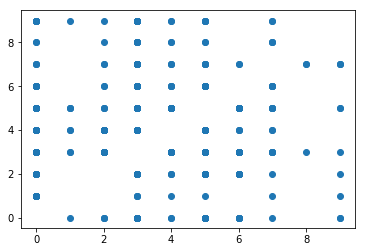

In [159]:
# Just a quick scatter plot

plt.scatter(top1, top2)

In [160]:
# Get those file index having component4 in top explanation

fname = 'allGenIndexList_TP.txt'    # we wrote the actual devfile indices to this file earlier
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
    
# Write the top component index to the file and further analysis
fname='topExplanation_list_Genuine_TP.txt'    
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==3:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

### Note: 
> the file topExplanation_list_Genuine_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all genuine files that were correctly classified by CNN. We took 0.5 as score threshold to further filter the genuine files and get 766 genuine TP audio files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index for all these 766 files.
 1. We then analysed the explanation index distribution for these 766 files and find that the component 4 that corresponds to 900-1200ms audio are maximally activated (got highest count = 271/766)
 1. Then we take these 271 audio file index and plot their spectrograms and try to find similarity.
